In [1]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB7

from tensorflow.keras import Model
#from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Limit GPU Memory Growth to only what's needed
import tensorflow as tf 
physical_devices = tf.config.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    print('Failed to limit GPU memory')

In [3]:
#Gather Pre-proccessed images 

train_path = 'dataset-classification/train-segmented'
valid_path = 'dataset-classification/validate-segmented'

train_generator = ImageDataGenerator().flow_from_directory(train_path, target_size=(256,256))
valid_generator = ImageDataGenerator().flow_from_directory(valid_path, target_size=(256,256))

Found 2400 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [4]:
#Build Model 

base_model = EfficientNetB7(weights='imagenet', include_top = False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
preds = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs = preds)

258076736/258076736 [==============================] - 13s 0us/step


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                            

                                                                                                  
 block1b_add (Add)              (None, None, None,   0           ['block1b_drop[0][0]',           
                                32)                               'block1a_project_bn[0][0]']     
                                                                                                  
 block1c_dwconv (DepthwiseConv2  (None, None, None,   288        ['block1b_add[0][0]']            
 D)                             32)                                                               
                                                                                                  
 block1c_bn (BatchNormalization  (None, None, None,   128        ['block1c_dwconv[0][0]']         
 )                              32)                                                               
                                                                                                  
 block1c_a

 D)                             192)                                                              
                                                                                                  
 block2a_bn (BatchNormalization  (None, None, None,   768        ['block2a_dwconv[0][0]']         
 )                              192)                                                              
                                                                                                  
 block2a_activation (Activation  (None, None, None,   0          ['block2a_bn[0][0]']             
 )                              192)                                                              
                                                                                                  
 block2a_se_squeeze (GlobalAver  (None, 192)         0           ['block2a_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block2c_activation (Activation  (None, None, None,   0          ['block2c_bn[0][0]']             
 )                              288)                                                              
                                                                                                  
 block2c_se_squeeze (GlobalAver  (None, 288)         0           ['block2c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2c_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2c_se_squeeze[0][0]']     
                                                                                                  
 block2c_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2c_se_reshape[0][0]']     
                                                                                                  
 block2c_s

                                                                                                  
 block2e_activation (Activation  (None, None, None,   0          ['block2e_bn[0][0]']             
 )                              288)                                                              
                                                                                                  
 block2e_se_squeeze (GlobalAver  (None, 288)         0           ['block2e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2e_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2e_se_squeeze[0][0]']     
                                                                                                  
 block2e_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2e_se_reshape[0][0]']     
          

 )                              288)                                                              
                                                                                                  
 block2g_activation (Activation  (None, None, None,   0          ['block2g_bn[0][0]']             
 )                              288)                                                              
                                                                                                  
 block2g_se_squeeze (GlobalAver  (None, 288)         0           ['block2g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2g_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2g_se_squeeze[0][0]']     
                                                                                                  
 block2g_s

 block3b_activation (Activation  (None, None, None,   0          ['block3b_bn[0][0]']             
 )                              480)                                                              
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 480)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3b_se_reshape[0][0]']     
                                                                                                  
 block3b_s

                                                                                                  
 block3d_activation (Activation  (None, None, None,   0          ['block3d_bn[0][0]']             
 )                              480)                                                              
                                                                                                  
 block3d_se_squeeze (GlobalAver  (None, 480)         0           ['block3d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3d_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3d_se_squeeze[0][0]']     
                                                                                                  
 block3d_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3d_se_reshape[0][0]']     
          

 )                              480)                                                              
                                                                                                  
 block3f_activation (Activation  (None, None, None,   0          ['block3f_bn[0][0]']             
 )                              480)                                                              
                                                                                                  
 block3f_se_squeeze (GlobalAver  (None, 480)         0           ['block3f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3f_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3f_se_squeeze[0][0]']     
                                                                                                  
 block3f_s

 block4a_dwconv (DepthwiseConv2  (None, None, None,   4320       ['block4a_dwconv_pad[0][0]']     
 D)                             480)                                                              
                                                                                                  
 block4a_bn (BatchNormalization  (None, None, None,   1920       ['block4a_dwconv[0][0]']         
 )                              480)                                                              
                                                                                                  
 block4a_activation (Activation  (None, None, None,   0          ['block4a_bn[0][0]']             
 )                              480)                                                              
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 480)         0           ['block4a_activation[0][0]']     
 agePoolin

                                                                                                  
 block4c_activation (Activation  (None, None, None,   0          ['block4c_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block4c_se_squeeze (GlobalAver  (None, 960)         0           ['block4c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4c_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4c_se_squeeze[0][0]']     
                                                                                                  
 block4c_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block4c_se_reshape[0][0]']     
          

 )                              960)                                                              
                                                                                                  
 block4e_activation (Activation  (None, None, None,   0          ['block4e_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block4e_se_squeeze (GlobalAver  (None, 960)         0           ['block4e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4e_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4e_se_squeeze[0][0]']     
                                                                                                  
 block4e_s

 block4g_bn (BatchNormalization  (None, None, None,   3840       ['block4g_dwconv[0][0]']         
 )                              960)                                                              
                                                                                                  
 block4g_activation (Activation  (None, None, None,   0          ['block4g_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block4g_se_squeeze (GlobalAver  (None, 960)         0           ['block4g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4g_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4g_se_squeeze[0][0]']     
          

                                                                                                  
 block4i_bn (BatchNormalization  (None, None, None,   3840       ['block4i_dwconv[0][0]']         
 )                              960)                                                              
                                                                                                  
 block4i_activation (Activation  (None, None, None,   0          ['block4i_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block4i_se_squeeze (GlobalAver  (None, 960)         0           ['block4i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4i_s

 D)                             960)                             ']                               
                                                                                                  
 block5a_bn (BatchNormalization  (None, None, None,   3840       ['block5a_dwconv[0][0]']         
 )                              960)                                                              
                                                                                                  
 block5a_activation (Activation  (None, None, None,   0          ['block5a_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 960)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5c_activation (Activation  (None, None, None,   0          ['block5c_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 1344)        0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5c_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5c_se_squeeze[0][0]']     
                                                                                                  
 block5c_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5c_se_reshape[0][0]']     
                                                                                                  
 block5c_s

                                                                                                  
 block5e_activation (Activation  (None, None, None,   0          ['block5e_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 1344)        0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5e_se_reshape[0][0]']     
          

 )                              1344)                                                             
                                                                                                  
 block5g_activation (Activation  (None, None, None,   0          ['block5g_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block5g_se_squeeze (GlobalAver  (None, 1344)        0           ['block5g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_s

 block5i_bn (BatchNormalization  (None, None, None,   5376       ['block5i_dwconv[0][0]']         
 )                              1344)                                                             
                                                                                                  
 block5i_activation (Activation  (None, None, None,   0          ['block5i_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block5i_se_squeeze (GlobalAver  (None, 1344)        0           ['block5i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5i_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5i_se_squeeze[0][0]']     
          

                                                                                                  
 block6a_dwconv (DepthwiseConv2  (None, None, None,   33600      ['block6a_dwconv_pad[0][0]']     
 D)                             1344)                                                             
                                                                                                  
 block6a_bn (BatchNormalization  (None, None, None,   5376       ['block6a_dwconv[0][0]']         
 )                              1344)                                                             
                                                                                                  
 block6a_activation (Activation  (None, None, None,   0          ['block6a_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block6a_s

 )                              2304)                                                             
                                                                                                  
 block6c_activation (Activation  (None, None, None,   0          ['block6c_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6c_se_squeeze (GlobalAver  (None, 2304)        0           ['block6c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6c_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6c_se_squeeze[0][0]']     
                                                                                                  
 block6c_s

 block6e_bn (BatchNormalization  (None, None, None,   9216       ['block6e_dwconv[0][0]']         
 )                              2304)                                                             
                                                                                                  
 block6e_activation (Activation  (None, None, None,   0          ['block6e_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6e_se_squeeze (GlobalAver  (None, 2304)        0           ['block6e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6e_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6e_se_squeeze[0][0]']     
          

                                                                                                  
 block6g_bn (BatchNormalization  (None, None, None,   9216       ['block6g_dwconv[0][0]']         
 )                              2304)                                                             
                                                                                                  
 block6g_activation (Activation  (None, None, None,   0          ['block6g_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6g_se_squeeze (GlobalAver  (None, 2304)        0           ['block6g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6g_s

 D)                             2304)                            ']                               
                                                                                                  
 block6i_bn (BatchNormalization  (None, None, None,   9216       ['block6i_dwconv[0][0]']         
 )                              2304)                                                             
                                                                                                  
 block6i_activation (Activation  (None, None, None,   0          ['block6i_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6i_se_squeeze (GlobalAver  (None, 2304)        0           ['block6i_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block6k_dwconv (DepthwiseConv2  (None, None, None,   57600      ['block6k_expand_activation[0][0]
 D)                             2304)                            ']                               
                                                                                                  
 block6k_bn (BatchNormalization  (None, None, None,   9216       ['block6k_dwconv[0][0]']         
 )                              2304)                                                             
                                                                                                  
 block6k_activation (Activation  (None, None, None,   0          ['block6k_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6k_se_squeeze (GlobalAver  (None, 2304)        0           ['block6k_activation[0][0]']     
 agePoolin

                                                                                                  
 block6m_dwconv (DepthwiseConv2  (None, None, None,   57600      ['block6m_expand_activation[0][0]
 D)                             2304)                            ']                               
                                                                                                  
 block6m_bn (BatchNormalization  (None, None, None,   9216       ['block6m_dwconv[0][0]']         
 )                              2304)                                                             
                                                                                                  
 block6m_activation (Activation  (None, None, None,   0          ['block6m_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6m_s

 )                              3840)                                                             
                                                                                                  
 block7b_activation (Activation  (None, None, None,   0          ['block7b_bn[0][0]']             
 )                              3840)                                                             
                                                                                                  
 block7b_se_squeeze (GlobalAver  (None, 3840)        0           ['block7b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7b_se_reshape (Reshape)   (None, 1, 1, 3840)   0           ['block7b_se_squeeze[0][0]']     
                                                                                                  
 block7b_s

 block7d_bn (BatchNormalization  (None, None, None,   15360      ['block7d_dwconv[0][0]']         
 )                              3840)                                                             
                                                                                                  
 block7d_activation (Activation  (None, None, None,   0          ['block7d_bn[0][0]']             
 )                              3840)                                                             
                                                                                                  
 block7d_se_squeeze (GlobalAver  (None, 3840)        0           ['block7d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7d_se_reshape (Reshape)   (None, 1, 1, 3840)   0           ['block7d_se_squeeze[0][0]']     
          

In [6]:
for layers in model.layers[:-20]:
    layers.trainable = False
    

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                            

                                                                                                  
 block1b_add (Add)              (None, None, None,   0           ['block1b_drop[0][0]',           
                                32)                               'block1a_project_bn[0][0]']     
                                                                                                  
 block1c_dwconv (DepthwiseConv2  (None, None, None,   288        ['block1b_add[0][0]']            
 D)                             32)                                                               
                                                                                                  
 block1c_bn (BatchNormalization  (None, None, None,   128        ['block1c_dwconv[0][0]']         
 )                              32)                                                               
                                                                                                  
 block1c_a

 D)                             192)                                                              
                                                                                                  
 block2a_bn (BatchNormalization  (None, None, None,   768        ['block2a_dwconv[0][0]']         
 )                              192)                                                              
                                                                                                  
 block2a_activation (Activation  (None, None, None,   0          ['block2a_bn[0][0]']             
 )                              192)                                                              
                                                                                                  
 block2a_se_squeeze (GlobalAver  (None, 192)         0           ['block2a_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block2c_activation (Activation  (None, None, None,   0          ['block2c_bn[0][0]']             
 )                              288)                                                              
                                                                                                  
 block2c_se_squeeze (GlobalAver  (None, 288)         0           ['block2c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2c_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2c_se_squeeze[0][0]']     
                                                                                                  
 block2c_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2c_se_reshape[0][0]']     
                                                                                                  
 block2c_s

                                                                                                  
 block2e_activation (Activation  (None, None, None,   0          ['block2e_bn[0][0]']             
 )                              288)                                                              
                                                                                                  
 block2e_se_squeeze (GlobalAver  (None, 288)         0           ['block2e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2e_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2e_se_squeeze[0][0]']     
                                                                                                  
 block2e_se_reduce (Conv2D)     (None, 1, 1, 12)     3468        ['block2e_se_reshape[0][0]']     
          

 )                              288)                                                              
                                                                                                  
 block2g_activation (Activation  (None, None, None,   0          ['block2g_bn[0][0]']             
 )                              288)                                                              
                                                                                                  
 block2g_se_squeeze (GlobalAver  (None, 288)         0           ['block2g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2g_se_reshape (Reshape)   (None, 1, 1, 288)    0           ['block2g_se_squeeze[0][0]']     
                                                                                                  
 block2g_s

 block3b_activation (Activation  (None, None, None,   0          ['block3b_bn[0][0]']             
 )                              480)                                                              
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 480)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3b_se_reshape[0][0]']     
                                                                                                  
 block3b_s

                                                                                                  
 block3d_activation (Activation  (None, None, None,   0          ['block3d_bn[0][0]']             
 )                              480)                                                              
                                                                                                  
 block3d_se_squeeze (GlobalAver  (None, 480)         0           ['block3d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3d_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3d_se_squeeze[0][0]']     
                                                                                                  
 block3d_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block3d_se_reshape[0][0]']     
          

 )                              480)                                                              
                                                                                                  
 block3f_activation (Activation  (None, None, None,   0          ['block3f_bn[0][0]']             
 )                              480)                                                              
                                                                                                  
 block3f_se_squeeze (GlobalAver  (None, 480)         0           ['block3f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3f_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block3f_se_squeeze[0][0]']     
                                                                                                  
 block3f_s

 block4a_dwconv (DepthwiseConv2  (None, None, None,   4320       ['block4a_dwconv_pad[0][0]']     
 D)                             480)                                                              
                                                                                                  
 block4a_bn (BatchNormalization  (None, None, None,   1920       ['block4a_dwconv[0][0]']         
 )                              480)                                                              
                                                                                                  
 block4a_activation (Activation  (None, None, None,   0          ['block4a_bn[0][0]']             
 )                              480)                                                              
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 480)         0           ['block4a_activation[0][0]']     
 agePoolin

                                                                                                  
 block4c_activation (Activation  (None, None, None,   0          ['block4c_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block4c_se_squeeze (GlobalAver  (None, 960)         0           ['block4c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4c_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4c_se_squeeze[0][0]']     
                                                                                                  
 block4c_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block4c_se_reshape[0][0]']     
          

 )                              960)                                                              
                                                                                                  
 block4e_activation (Activation  (None, None, None,   0          ['block4e_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block4e_se_squeeze (GlobalAver  (None, 960)         0           ['block4e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4e_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4e_se_squeeze[0][0]']     
                                                                                                  
 block4e_s

 block4g_bn (BatchNormalization  (None, None, None,   3840       ['block4g_dwconv[0][0]']         
 )                              960)                                                              
                                                                                                  
 block4g_activation (Activation  (None, None, None,   0          ['block4g_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block4g_se_squeeze (GlobalAver  (None, 960)         0           ['block4g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4g_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block4g_se_squeeze[0][0]']     
          

                                                                                                  
 block4i_bn (BatchNormalization  (None, None, None,   3840       ['block4i_dwconv[0][0]']         
 )                              960)                                                              
                                                                                                  
 block4i_activation (Activation  (None, None, None,   0          ['block4i_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block4i_se_squeeze (GlobalAver  (None, 960)         0           ['block4i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4i_s

 D)                             960)                             ']                               
                                                                                                  
 block5a_bn (BatchNormalization  (None, None, None,   3840       ['block5a_dwconv[0][0]']         
 )                              960)                                                              
                                                                                                  
 block5a_activation (Activation  (None, None, None,   0          ['block5a_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 960)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5c_activation (Activation  (None, None, None,   0          ['block5c_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 1344)        0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5c_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5c_se_squeeze[0][0]']     
                                                                                                  
 block5c_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5c_se_reshape[0][0]']     
                                                                                                  
 block5c_s

                                                                                                  
 block5e_activation (Activation  (None, None, None,   0          ['block5e_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 1344)        0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_se_reduce (Conv2D)     (None, 1, 1, 56)     75320       ['block5e_se_reshape[0][0]']     
          

 )                              1344)                                                             
                                                                                                  
 block5g_activation (Activation  (None, None, None,   0          ['block5g_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block5g_se_squeeze (GlobalAver  (None, 1344)        0           ['block5g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_s

 block5i_bn (BatchNormalization  (None, None, None,   5376       ['block5i_dwconv[0][0]']         
 )                              1344)                                                             
                                                                                                  
 block5i_activation (Activation  (None, None, None,   0          ['block5i_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block5i_se_squeeze (GlobalAver  (None, 1344)        0           ['block5i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5i_se_reshape (Reshape)   (None, 1, 1, 1344)   0           ['block5i_se_squeeze[0][0]']     
          

                                                                                                  
 block6a_dwconv (DepthwiseConv2  (None, None, None,   33600      ['block6a_dwconv_pad[0][0]']     
 D)                             1344)                                                             
                                                                                                  
 block6a_bn (BatchNormalization  (None, None, None,   5376       ['block6a_dwconv[0][0]']         
 )                              1344)                                                             
                                                                                                  
 block6a_activation (Activation  (None, None, None,   0          ['block6a_bn[0][0]']             
 )                              1344)                                                             
                                                                                                  
 block6a_s

 )                              2304)                                                             
                                                                                                  
 block6c_activation (Activation  (None, None, None,   0          ['block6c_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6c_se_squeeze (GlobalAver  (None, 2304)        0           ['block6c_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6c_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6c_se_squeeze[0][0]']     
                                                                                                  
 block6c_s

 block6e_bn (BatchNormalization  (None, None, None,   9216       ['block6e_dwconv[0][0]']         
 )                              2304)                                                             
                                                                                                  
 block6e_activation (Activation  (None, None, None,   0          ['block6e_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6e_se_squeeze (GlobalAver  (None, 2304)        0           ['block6e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6e_se_reshape (Reshape)   (None, 1, 1, 2304)   0           ['block6e_se_squeeze[0][0]']     
          

                                                                                                  
 block6g_bn (BatchNormalization  (None, None, None,   9216       ['block6g_dwconv[0][0]']         
 )                              2304)                                                             
                                                                                                  
 block6g_activation (Activation  (None, None, None,   0          ['block6g_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6g_se_squeeze (GlobalAver  (None, 2304)        0           ['block6g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6g_s

 D)                             2304)                            ']                               
                                                                                                  
 block6i_bn (BatchNormalization  (None, None, None,   9216       ['block6i_dwconv[0][0]']         
 )                              2304)                                                             
                                                                                                  
 block6i_activation (Activation  (None, None, None,   0          ['block6i_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6i_se_squeeze (GlobalAver  (None, 2304)        0           ['block6i_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block6k_dwconv (DepthwiseConv2  (None, None, None,   57600      ['block6k_expand_activation[0][0]
 D)                             2304)                            ']                               
                                                                                                  
 block6k_bn (BatchNormalization  (None, None, None,   9216       ['block6k_dwconv[0][0]']         
 )                              2304)                                                             
                                                                                                  
 block6k_activation (Activation  (None, None, None,   0          ['block6k_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6k_se_squeeze (GlobalAver  (None, 2304)        0           ['block6k_activation[0][0]']     
 agePoolin

                                                                                                  
 block6m_dwconv (DepthwiseConv2  (None, None, None,   57600      ['block6m_expand_activation[0][0]
 D)                             2304)                            ']                               
                                                                                                  
 block6m_bn (BatchNormalization  (None, None, None,   9216       ['block6m_dwconv[0][0]']         
 )                              2304)                                                             
                                                                                                  
 block6m_activation (Activation  (None, None, None,   0          ['block6m_bn[0][0]']             
 )                              2304)                                                             
                                                                                                  
 block6m_s

 )                              3840)                                                             
                                                                                                  
 block7b_activation (Activation  (None, None, None,   0          ['block7b_bn[0][0]']             
 )                              3840)                                                             
                                                                                                  
 block7b_se_squeeze (GlobalAver  (None, 3840)        0           ['block7b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7b_se_reshape (Reshape)   (None, 1, 1, 3840)   0           ['block7b_se_squeeze[0][0]']     
                                                                                                  
 block7b_s

 block7d_bn (BatchNormalization  (None, None, None,   15360      ['block7d_dwconv[0][0]']         
 )                              3840)                                                             
                                                                                                  
 block7d_activation (Activation  (None, None, None,   0          ['block7d_bn[0][0]']             
 )                              3840)                                                             
                                                                                                  
 block7d_se_squeeze (GlobalAver  (None, 3840)        0           ['block7d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7d_se_reshape (Reshape)   (None, 1, 1, 3840)   0           ['block7d_se_squeeze[0][0]']     
          

In [8]:
epochs = 20

optimizer = Adam(learning_rate = 0.0001)

model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])

model.fit(train_generator, validation_data=valid_generator, epochs = epochs, verbose=2)

Epoch 1/20
75/75 - 140s - loss: 0.5123 - accuracy: 0.8188 - val_loss: 0.4499 - val_accuracy: 0.8033 - 140s/epoch - 2s/step
Epoch 2/20
75/75 - 82s - loss: 0.1855 - accuracy: 0.9325 - val_loss: 0.5072 - val_accuracy: 0.8067 - 82s/epoch - 1s/step
Epoch 3/20
75/75 - 84s - loss: 0.1269 - accuracy: 0.9525 - val_loss: 0.1920 - val_accuracy: 0.9300 - 84s/epoch - 1s/step
Epoch 4/20
75/75 - 82s - loss: 0.0966 - accuracy: 0.9675 - val_loss: 0.2500 - val_accuracy: 0.9067 - 82s/epoch - 1s/step
Epoch 5/20
75/75 - 82s - loss: 0.0860 - accuracy: 0.9700 - val_loss: 0.1024 - val_accuracy: 0.9567 - 82s/epoch - 1s/step
Epoch 6/20
75/75 - 85s - loss: 0.0624 - accuracy: 0.9779 - val_loss: 0.1094 - val_accuracy: 0.9600 - 85s/epoch - 1s/step
Epoch 7/20
75/75 - 83s - loss: 0.0557 - accuracy: 0.9825 - val_loss: 0.0582 - val_accuracy: 0.9767 - 83s/epoch - 1s/step
Epoch 8/20
75/75 - 83s - loss: 0.0465 - accuracy: 0.9837 - val_loss: 0.0791 - val_accuracy: 0.9800 - 83s/epoch - 1s/step
Epoch 9/20
75/75 - 88s - loss:

In [9]:
test_path = 'dataset-classification/test-segmented'
test_generator = ImageDataGenerator().flow_from_directory(test_path, target_size=(256,256))
predictions = model.predict(x = test_generator, verbose = 0)

Found 300 images belonging to 3 classes.


In [10]:
test_labels = test_generator.classes
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))
test_generator.class_indices

{'-K': 0, '-N': 1, 'FN': 2}

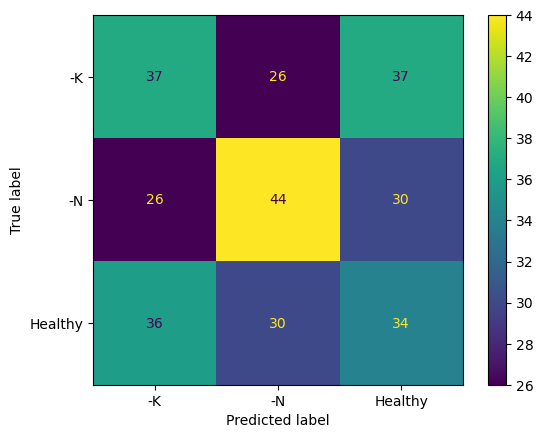

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['-K', '-N', 'Healthy'])
disp.plot()
plt.show()

In [12]:
from sklearn.metrics import classification_report 

print(classification_report(test_labels,predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.37      0.37      0.37       100
           1       0.44      0.44      0.44       100
           2       0.34      0.34      0.34       100

    accuracy                           0.38       300
   macro avg       0.38      0.38      0.38       300
weighted avg       0.38      0.38      0.38       300



In [13]:
#model.save("EfficientNetB0.h5")

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.